<a href="https://colab.research.google.com/github/zghnjkt/kwonkt0317/blob/main/%EB%85%BC%ED%94%84_CNN%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


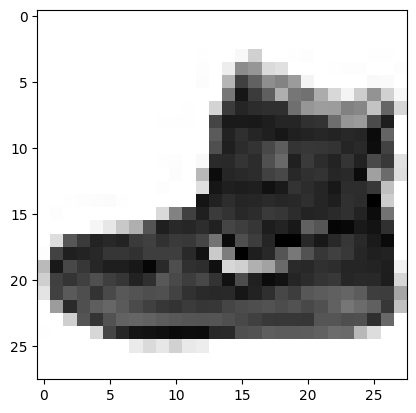

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  13 73 0  0  1  4  0  0  0  0  1  1  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  0  36 13612762 54 0  0  0  1  3  4  0  0  3  
0  0  0  0  0  0  0  0  0  0  0  0  6  0  10220417613414412323 0  0  0  0  12 10 0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  15523620717810715616110964 23 77 13072 15 
0  0  0  0  0  0  0  0  0  0  0  1  0  69 20722321821621616312712112214614188 17266 
0  0  0  0  0  0  0  0  0  1  1  1  0  2002322322332292232232152131641271231962290  
0  0  0  0  0  0  0  0  0  0  0  0  0  1832252162232282352272242222242212232451730  
0  0  0  0  0  0  0  0  0  0  0  0  0  1932282182131981802122102112132232202432020  
0  0  0  0  0  0  0  0  0  1  3  0  12 21922021221819216922720821

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 9 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# 컨볼루션 신경망(CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist           #fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()      #fashion_mnist
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)   #y_train, 10
y_test = to_categorical(y_test, 10)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))   #32
model.add(Conv2D(64, (3, 3), activation='relu'))   #64
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,  activation='relu')) #64
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = '/content/deeplearning/data/model'
if not os.path.exists(MODEL_DIR):
     !git clone https://github.com/taehojo/deeplearning.git

modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=12)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=180, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.41763, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.41763 to 0.35127, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.35127 to 0.30845, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.30845 to 0.27651, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.27651 to 0.26829, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.26829 to 0.25976, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.25976 to 0.24424, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.24424 to 0.24274, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.24274 to 0.23344, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.23344

Epoch 11: val_loss did not improve from 0.23344

Epoch 12: val_loss improved from

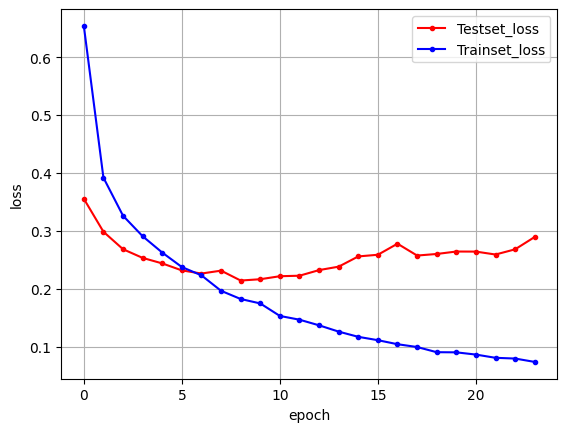

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()